Principal Component Analysis (PCA)

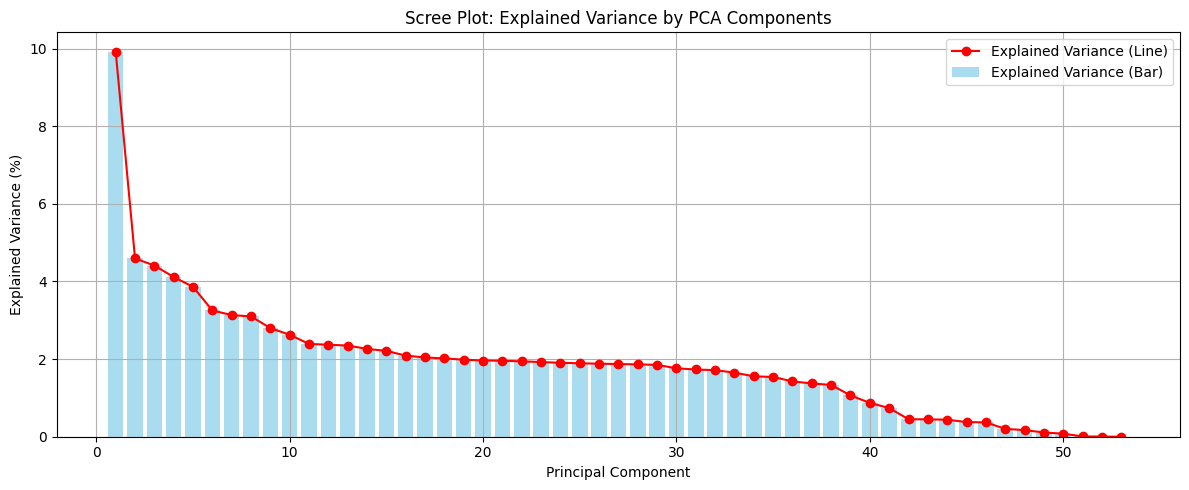


Total Explained Variance by First 4 Components: 23.04%

PCA Component Loadings (first 4 PCs):
                                 PC1    PC2    PC3    PC4
age                            0.005 -0.313  0.275  0.175
duration                      -0.021 -0.019 -0.017 -0.021
campaign                       0.080  0.012  0.015 -0.059
pdays                          0.247  0.145 -0.205  0.357
previous                      -0.303 -0.128  0.088 -0.227
emp.var.rate                   0.388  0.016  0.137 -0.169
cons.price.idx                 0.296 -0.119  0.015 -0.351
cons.conf.idx                  0.056 -0.033  0.339 -0.075
euribor3m                      0.390  0.026  0.155 -0.134
nr.employed                    0.384  0.073  0.108 -0.049
job_blue-collar                0.061 -0.281 -0.253  0.064
job_entrepreneur               0.010 -0.019  0.013  0.033
job_housemaid                  0.018 -0.052  0.057  0.008
job_management                -0.011  0.021  0.099  0.061
job_retired                   -0.05

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Drop target column (y) and encode categorical variables
df_features = df.drop(columns='y')
df_encoded = pd.get_dummies(df_features, drop_first=True)

# Standardize numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_variance)

# Scree Plot: Bar + Line
plt.figure(figsize=(12, 5))
components = np.arange(1, len(explained_variance) + 1)

plt.bar(components, explained_variance * 100, alpha=0.7, label='Explained Variance (Bar)', color='skyblue')
plt.plot(components, explained_variance * 100, 'r-o', label='Explained Variance (Line)')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot: Explained Variance by PCA Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PCA Loadings Table for first 4 components
feature_names = df_encoded.columns

loadings = pd.DataFrame(pca.components_[:4].T,
                        columns=[f'PC{i+1}' for i in range(4)],
                        index=feature_names)

# Print total variance explained
print("\nTotal Explained Variance by First 4 Components: {:.2f}%".format(np.sum(explained_variance[:4]) * 100))
print("\nPCA Component Loadings (first 4 PCs):")
print(loadings.round(3))


# New Section

Factor Analysis


Top variables for Factor 1:
poutcome_nonexistent    3.508912e-07
day_of_week_wed         2.249412e-07
month_mar               1.466760e-07
day_of_week_thu         9.879624e-08
day_of_week_tue         9.849936e-08
Name: Factor1, dtype: float64

Top variables for Factor 2:
day_of_week_wed         1.596386e-07
day_of_week_thu         1.344726e-07
month_jul               9.229673e-08
day_of_week_tue         7.777886e-08
poutcome_nonexistent    6.907497e-08
Name: Factor2, dtype: float64

Top variables for Factor 3:
day_of_week_wed         1.621793e-07
month_oct               9.358344e-08
poutcome_nonexistent    6.465608e-08
month_nov               5.314625e-08
month_mar               4.589562e-08
Name: Factor3, dtype: float64

Top variables for Factor 4:
month_sep               9.907894e-08
month_mar               7.534453e-08
day_of_week_thu         5.054781e-08
job_services            4.431487e-08
poutcome_nonexistent    3.703246e-08
Name: Factor4, dtype: float64

Top variables for Facto

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


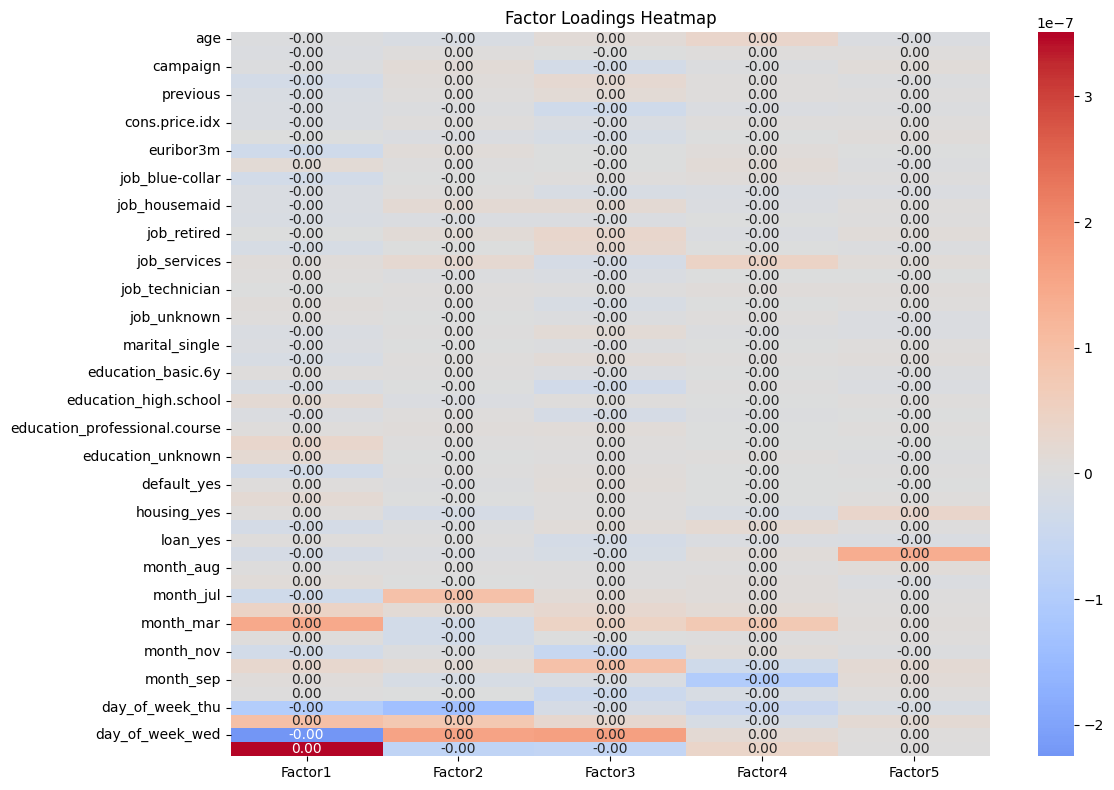

In [ ]:
!pip install factor_analyzer

# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Drop the target variable
df = df.drop(columns='y')

# One-hot encode categorical variables (drop_first avoids multicollinearity)
df_encoded = pd.get_dummies(df, drop_first=True)

# Remove columns with zero variance
df_encoded = df_encoded.loc[:, df_encoded.std() > 0.0]

# Remove duplicate columns (if any)
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Check if correlation matrix is singular
corr_matrix = np.corrcoef(X_scaled, rowvar=False)
if np.linalg.matrix_rank(corr_matrix) < corr_matrix.shape[0]:
    print("Warning: Correlation matrix is singular. Reducing dimensions.")
    # Use PCA to reduce dimensions slightly to fix singularity
    from sklearn.decomposition import PCA
    pca = PCA(n_components=corr_matrix.shape[0] - 1)
    X_scaled = pca.fit_transform(X_scaled)

# Apply Factor Analysis (assume 5 factors)
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(X_scaled)

# Factor loadings
loadings = pd.DataFrame(fa.loadings_,
                        index=df_encoded.columns[:X_scaled.shape[1]],
                        columns=[f'Factor{i+1}' for i in range(5)])

# Display top features for each factor
for i in range(5):
    print(f"\nTop variables for Factor {i+1}:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(5))

# Plot heatmap of factor loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Factor Loadings Heatmap")
plt.tight_layout()
plt.show()


Linear Discriminant Analysis (LDA)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.62      0.51      0.56       935

    accuracy                           0.91      8238
   macro avg       0.78      0.74      0.75      8238
weighted avg       0.90      0.91      0.90      8238

Confusion Matrix:
[[7004  299]
 [ 454  481]]


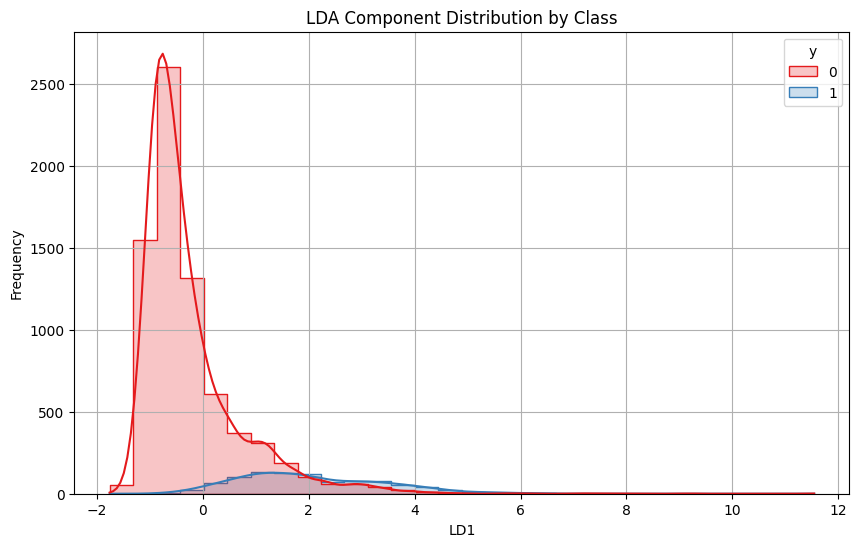

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Separate features and target
X = df.drop(columns=['y'])
y = df['y']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode target variable
y_encoded = y.map({'no': 0, 'yes': 1})

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)

# Predict on test set
y_pred = lda.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# 2D Visualization using LDA
X_test_lda = lda.transform(X_test)

plt.figure(figsize=(10, 6))
sns.histplot(x=X_test_lda[:, 0], hue=y_test, bins=30, kde=True, palette='Set1', element='step')
plt.title('LDA Component Distribution by Class')
plt.xlabel('LD1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Cluster Analysis (K-Means)

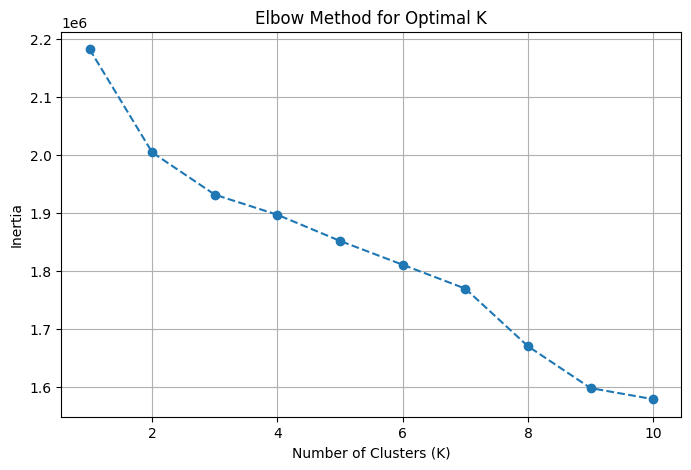

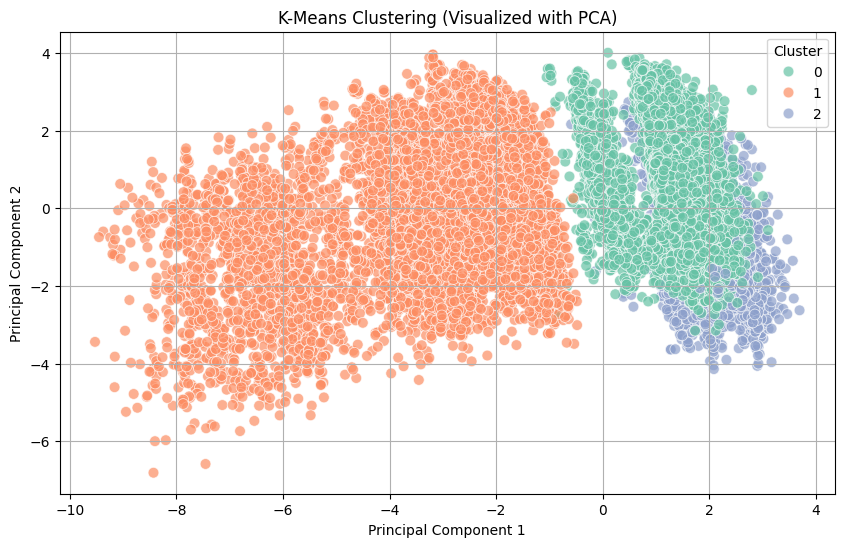

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Drop target variable
X = df.drop(columns=['y'])

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Determine optimal number of clusters using the Elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Apply K-Means with chosen K (e.g., K=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=60, alpha=0.7)
plt.title('K-Means Clustering (Visualized with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


(Optional) Canonical Correlation Analysis (CCA)

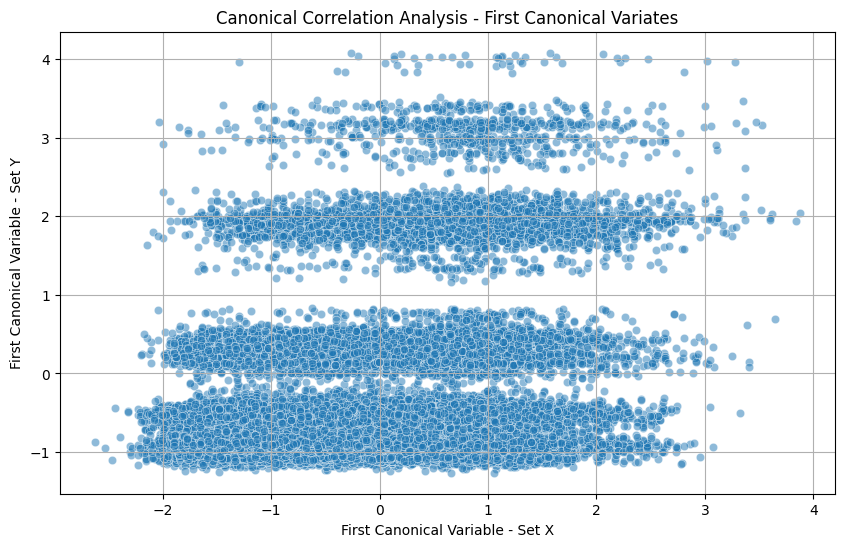

Canonical correlation (1st component): 0.330


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Define variable groups (you can adjust these sets based on interest)
X_vars = ['age', 'job', 'marital', 'education', 'housing', 'loan']
Y_vars = ['contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']

# Encode categorical variables
df_encoded = pd.get_dummies(df[X_vars + Y_vars], drop_first=True)

# Separate and scale sets
X = df_encoded[[col for col in df_encoded.columns if col.startswith(tuple(X_vars))]]
Y = df_encoded[[col for col in df_encoded.columns if col.startswith(tuple(Y_vars))]]

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Apply CCA
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X_scaled, Y_scaled)

# Visualize first canonical components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_c[:, 0], y=Y_c[:, 0], alpha=0.5)
plt.title('Canonical Correlation Analysis - First Canonical Variates')
plt.xlabel('First Canonical Variable - Set X')
plt.ylabel('First Canonical Variable - Set Y')
plt.grid(True)
plt.show()

# Optional: Correlation between canonical variables
import numpy as np
correlation = np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1]
print(f"Canonical correlation (1st component): {correlation:.3f}")


r corrct f analysis

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Top variables for Factor 1:
poutcome_nonexistent    3.508912e-07
day_of_week_wed         2.249412e-07
month_mar               1.466760e-07
day_of_week_thu         9.879624e-08
day_of_week_tue         9.849936e-08
Name: Factor1, dtype: float64

Top variables for Factor 2:
day_of_week_wed         1.596386e-07
day_of_week_thu         1.344726e-07
month_jul               9.229673e-08
day_of_week_tue         7.777886e-08
poutcome_nonexistent    6.907497e-08
Name: Factor2, dtype: float64

Top variables for Factor 3:
day_of_week_wed         1.621793e-07
month_oct               9.358344e-08
poutcome_nonexistent    6.465608e-08
month_nov               5.314625e-08
month_mar               4.589562e-08
Name: Factor3, dtype: float64

Top variables for Factor 4:
month_sep               9.907894e-08
month_mar               7.534453e-08
day_of_week_thu         5.054781e-08
job_services            4.431487e-08
poutcome_nonexistent    3.703246e-08
Name: Factor4, dtype: float64

Top variables for Facto

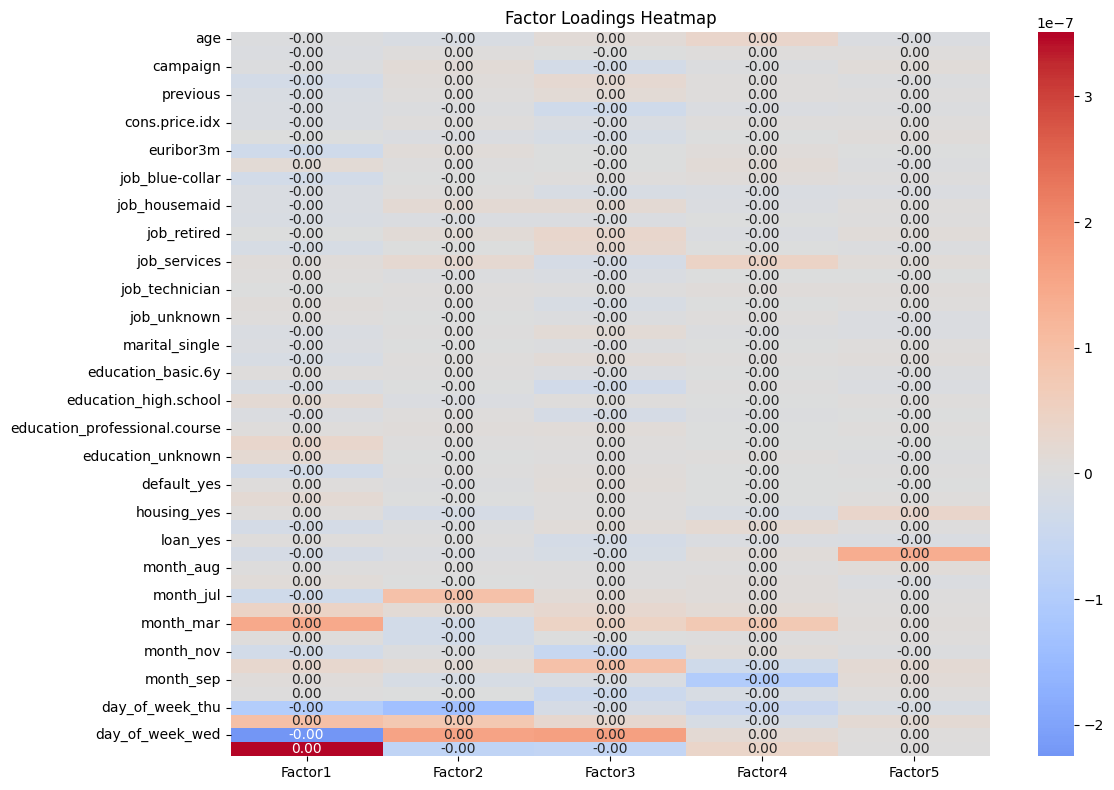